In [1]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv('cnbc.csv')

In [4]:
# Praproses teks
max_features = 2000  # Jumlah kata yang akan di-tokenisasi
max_len = 100  # Panjang maksimum dari setiap sequence

tokenizer = Tokenizer(num_words=max_features, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Stem_article'])
X = tokenizer.texts_to_sequences(df['Stem_article'])
X = pad_sequences(X, maxlen=max_len)

y = df['polarity']

In [5]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Bangun model LSTM
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
# Latih model
epochs = 5
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluasi model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

Epoch 1/5
45/45 - 10s - 231ms/step - accuracy: 0.7055 - loss: 0.6204 - val_accuracy: 0.7675 - val_loss: 0.5398
Epoch 2/5
45/45 - 5s - 102ms/step - accuracy: 0.7672 - loss: 0.4947 - val_accuracy: 0.7843 - val_loss: 0.5125
Epoch 3/5
45/45 - 3s - 71ms/step - accuracy: 0.8562 - loss: 0.3499 - val_accuracy: 0.7591 - val_loss: 0.5559
Epoch 4/5
45/45 - 3s - 73ms/step - accuracy: 0.8948 - loss: 0.2693 - val_accuracy: 0.7787 - val_loss: 0.5820
Epoch 5/5
45/45 - 5s - 111ms/step - accuracy: 0.9285 - loss: 0.2167 - val_accuracy: 0.7451 - val_loss: 0.7578
Loss: 0.7578046321868896
Accuracy: 0.7450980544090271


In [10]:
# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Mengonversi probabilitas ke kelas biner

# Evaluasi hasil prediksi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
[[223  51]
 [ 40  43]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       274
           1       0.46      0.52      0.49        83

    accuracy                           0.75       357
   macro avg       0.65      0.67      0.66       357
weighted avg       0.76      0.75      0.75       357



In [18]:
# Evaluasi hasil prediksi
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[223  51]
 [ 40  43]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       274
           1       0.46      0.52      0.49        83

    accuracy                           0.75       357
   macro avg       0.65      0.67      0.66       357
weighted avg       0.76      0.75      0.75       357



In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


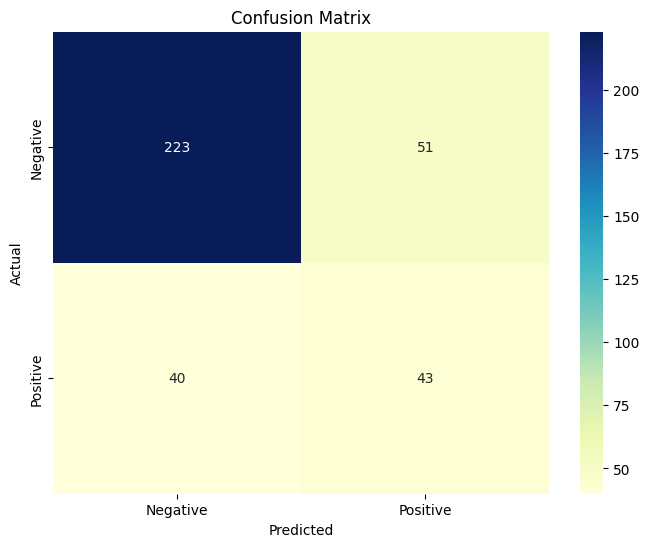

In [20]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()